# 마켓과 머신러닝
## 도미와 빙어 알고리즘으로 구별하기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
bream_length=[25.4,26.3,26.5,29.0,29.0,29.7,29.7,30.0,30.0,30.7,
              31.0,31.0,31.5,32.0,32.0,32.0,33.0,33.0,33.5,33.5,
              34.0,34.0,34.5,35.0,35.0,35.0,35.0,36.0,36.0,37.0,
              38.5,38.5,39.5,41.0,41.0]
bream_weight=[242.0,290.0,340.0,363.0,430.0,450.0,500.0,390.0,
              450.0,500.0,475.0,500.0,500.0,340.0,600.0,600.0,
              700.0,700.0,610.0,650.0,575.0,685.0,620.0,680.0,
              700.0,725.0,720.0,714.0,850.0,1000.0,920.0,955.0,
              925.0,975.0,950.0]

In [3]:
pd.Series(bream_length).shape

(35,)

In [4]:
pd.Series(bream_weight).shape

(35,)

Text(0, 0.5, 'weight')

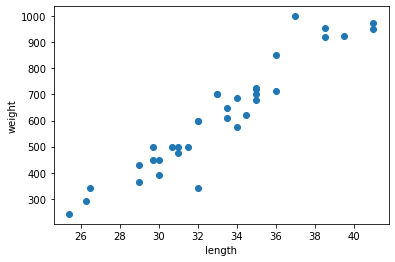

In [5]:
plt.scatter(bream_length,bream_weight)
plt.xlabel("length")
plt.ylabel("weight")

In [6]:
smelt_length=[9.8,10.5,10.6,11.0,11.2,11.3,11.8,11.8,12.0,12.2,
             12.4,13.0,14.3,15.0]
smelt_weight=[6.7,7.5,7.0,9.7,9.8,8.7,10.0,9.9,9.8,12.2,13.4,
             12.2,19.7,19.9]

In [7]:
print(pd.Series(smelt_length).shape)
pd.Series(smelt_weight).shape

(14,)


(14,)

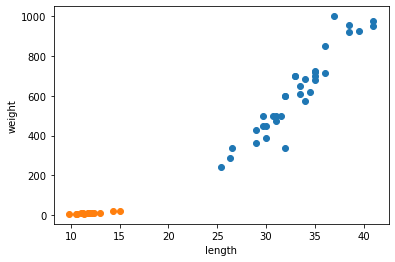

In [8]:
plt.scatter(bream_length,bream_weight)
plt.scatter(smelt_length,smelt_weight)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [9]:
length=bream_length+smelt_length
weight=bream_weight+smelt_weight

In [10]:
fish_data=[[i,w] for i,w in zip(length,weight)]
fish_data

[[25.4, 242.0],
 [26.3, 290.0],
 [26.5, 340.0],
 [29.0, 363.0],
 [29.0, 430.0],
 [29.7, 450.0],
 [29.7, 500.0],
 [30.0, 390.0],
 [30.0, 450.0],
 [30.7, 500.0],
 [31.0, 475.0],
 [31.0, 500.0],
 [31.5, 500.0],
 [32.0, 340.0],
 [32.0, 600.0],
 [32.0, 600.0],
 [33.0, 700.0],
 [33.0, 700.0],
 [33.5, 610.0],
 [33.5, 650.0],
 [34.0, 575.0],
 [34.0, 685.0],
 [34.5, 620.0],
 [35.0, 680.0],
 [35.0, 700.0],
 [35.0, 725.0],
 [35.0, 720.0],
 [36.0, 714.0],
 [36.0, 850.0],
 [37.0, 1000.0],
 [38.5, 920.0],
 [38.5, 955.0],
 [39.5, 925.0],
 [41.0, 975.0],
 [41.0, 950.0],
 [9.8, 6.7],
 [10.5, 7.5],
 [10.6, 7.0],
 [11.0, 9.7],
 [11.2, 9.8],
 [11.3, 8.7],
 [11.8, 10.0],
 [11.8, 9.9],
 [12.0, 9.8],
 [12.2, 12.2],
 [12.4, 13.4],
 [13.0, 12.2],
 [14.3, 19.7],
 [15.0, 19.9]]

In [11]:
fish_target=[1]*35+[0]*14 #1은 도미, 0은 빙어
fish_target

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

# k-최근접 이웃(지도 학습)
- KNeighborsClassifier

In [12]:
from sklearn.neighbors import KNeighborsClassifier #주변 인접으로 예측한다
kn=KNeighborsClassifier()
kn.fit(fish_data,fish_target)
kn.score(fish_data,fish_target)

1.0

- 새로운 생선 예측

In [13]:
kn.predict([[30,600]]) #2차원 데이터로 넣어줘야되 

#결과값 array([1]) 도미를 예측

array([1])

In [14]:
kn49=KNeighborsClassifier(n_neighbors=49)

kn49.fit(fish_data,fish_target)
print(kn49.score(fish_data,fish_target))

print(35/49)
#49개로 결정하면 35개가 도미이기때문에 새로운 값이 와도 전체 다수결의 원칙에 의해 도미라고 예측한다.

0.7142857142857143
0.7142857142857143


- 타겟 데이터가 없을때 비지도 학습 사용

# 훈련 세트와 테스트 세트

In [15]:
train_iput=fish_data[:35]
train_target=fish_target[:35]

test_input=fish_data[35:]
test_target=fish_target[35:]

# 테스트 세트에서 평가하기

In [16]:
from sklearn.neighbors import KNeighborsClassifier

kn=KNeighborsClassifier()
kn.fit(train_iput,train_target)
kn.score(test_input,test_target)

#도미랑 빙어 훈련 세트에는 도미밖에 없고,  테스트 세트에는 빙어밖에 없어서 0이 나옴
# 예를 들어 미적분 가르쳤는데, 통계 문제를 낸것이랑 같음
#빙어와 도미가 잘 섞여있는 데이터를 사용해야한다.

0.0

In [17]:
import numpy as np

input_arr=np.array(fish_data)
target_arr=np.array(fish_target)
input_arr

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


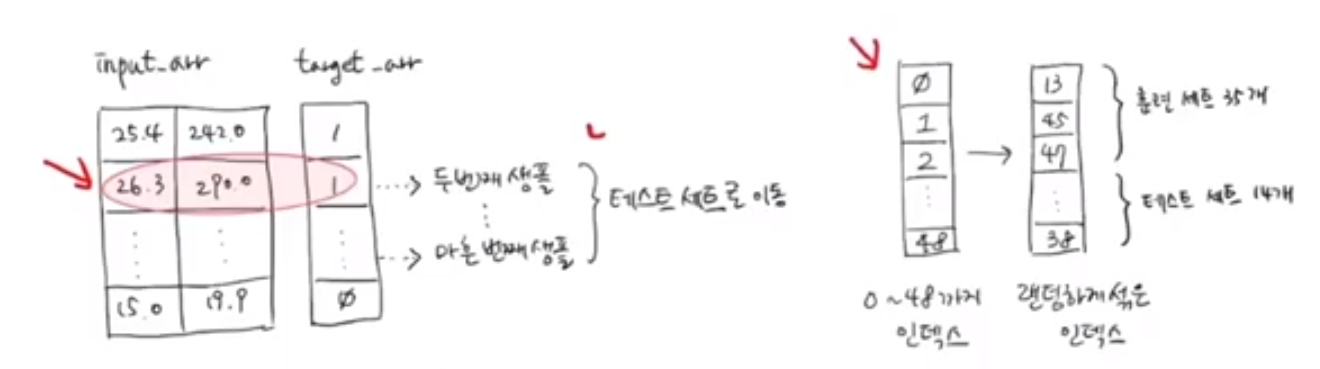

In [18]:
#섞어주기! 입력과 타켓이 한 세트로 섞어줘야되

index=np.arange(49)

np.random.shuffle(index)

index

array([13, 17,  5,  2, 40, 37, 26, 45, 19, 18,  9, 47, 20, 35, 14, 36,  4,
       21, 25,  1, 42, 12, 24,  8, 23, 15,  3, 11, 10, 44, 28, 22, 41, 30,
       16, 46, 29, 27, 39, 34,  6,  7, 43, 33, 32,  0, 48, 38, 31])

In [19]:
train_input=input_arr[index[:35]]
train_target=target_arr[index[:35]]

test_input=input_arr[index[35:]]
test_target=target_arr[index[35:]]

<function matplotlib.pyplot.show(close=None, block=None)>

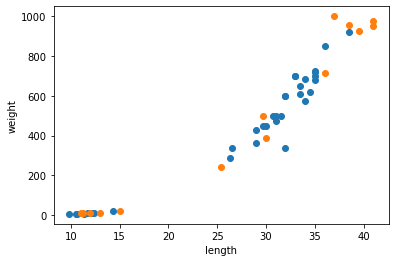

In [20]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(test_input[:,0],test_input[:,1])
plt.xlabel("length")
plt.ylabel("weight")
plt.show

In [21]:
# 두번째 머신러닝 프로그램

kn=kn.fit(train_input,train_target)
kn.score(test_input,test_target)

1.0

# 데이터 전처리

## numpy로 데이터 준비
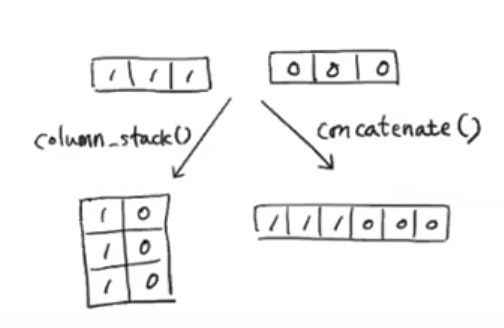

In [22]:
fish_data=np.column_stack((length,weight))
fish_data

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


In [23]:
fish_target=np.concatenate((np.ones(35),np.zeros(14)))
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## 사이킷런으로 데이터 나누기

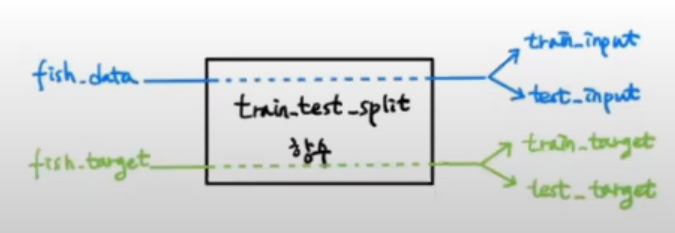

In [24]:
from sklearn.model_selection import train_test_split

train_input,test_input,train_target,test_target=train_test_split(
fish_data,fish_target,stratify=fish_target,random_state=42)

In [25]:
from sklearn.neighbors import KNeighborsClassifier

kn=KNeighborsClassifier()
kn.fit(train_input,train_target)
kn.score(test_input,test_target)

1.0

In [26]:
kn.predict([[25,150]])

array([0.])

In [27]:
distances, indexs= kn.kneighbors([[25,150]])
print(f"거리:{distances}")
print(f"인덱스:{indexs}")


거리:[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]
인덱스:[[21 33 19 30  1]]


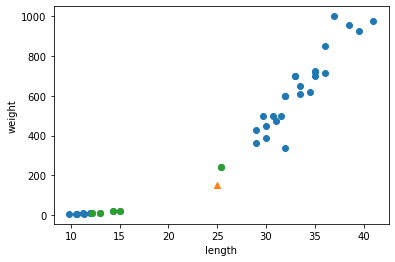

In [28]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker="^")
plt.scatter(train_input[indexs,0],train_input[indexs,1])
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [29]:
# x축과 y축 간격이 다르다.

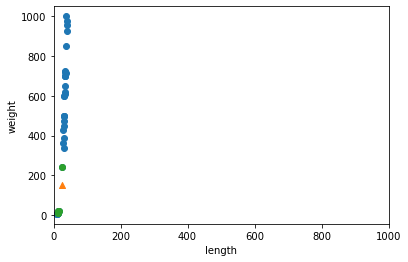

In [30]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker="^")
plt.scatter(train_input[indexs,0],train_input[indexs,1])
plt.xlim((0,1000))
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [31]:
# length 영향보다는 weigth 영향을 많이 받는다.

## 표준 점수로 바꾸기

- (특성-평균)/표준편차=z점수

In [32]:
train_input

array([[  29.7,  500. ],
       [  12.2,   12.2],
       [  33. ,  700. ],
       [  11.3,    8.7],
       [  39.5,  925. ],
       [  29. ,  430. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  31. ,  475. ],
       [  35. ,  720. ],
       [  37. , 1000. ],
       [  11.2,    9.8],
       [  34.5,  620. ],
       [  12. ,    9.8],
       [  29. ,  363. ],
       [  33. ,  700. ],
       [  30.7,  500. ],
       [  38.5,  955. ],
       [  33.5,  650. ],
       [  14.3,   19.7],
       [  31.5,  500. ],
       [  25.4,  242. ],
       [   9.8,    6.7],
       [  32. ,  600. ],
       [  10.5,    7.5],
       [  33.5,  610. ],
       [  10.6,    7. ],
       [  35. ,  700. ],
       [  32. ,  600. ],
       [  35. ,  725. ],
       [  13. ,   12.2],
       [  30. ,  450. ],
       [  32. ,  340. ],
       [  15. ,   19.9],
       [  30. ,  390. ],
       [  41. ,  975. ]])

In [33]:
mean=np.mean(train_input,axis=0)
std=np.std(train_input,axis=0)
print(mean,std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [34]:
#넘파이 브로드캐스팅
train_scaled=(train_input-mean)/std
train_scaled

array([[ 0.24070039,  0.14198246],
       [-1.51237757, -1.36683783],
       [ 0.5712808 ,  0.76060496],
       [-1.60253587, -1.37766373],
       [ 1.22242404,  1.45655528],
       [ 0.17057727, -0.07453542],
       [ 0.87180845,  0.80390854],
       [ 0.87180845,  1.22457184],
       [ 0.37092904,  0.06465464],
       [ 0.77163257,  0.82246721],
       [ 0.97198434,  1.68853872],
       [-1.61255346, -1.3742613 ],
       [ 0.72154463,  0.51315596],
       [-1.53241275, -1.3742613 ],
       [ 0.17057727, -0.28177396],
       [ 0.5712808 ,  0.76060496],
       [ 0.34087627,  0.14198246],
       [ 1.12224816,  1.54934866],
       [ 0.62136874,  0.60594934],
       [-1.30200822, -1.34363949],
       [ 0.42101698,  0.14198246],
       [-0.19005591, -0.65604058],
       [-1.75279969, -1.38384995],
       [ 0.47110492,  0.45129371],
       [-1.68267658, -1.38137546],
       [ 0.62136874,  0.48222484],
       [-1.67265899, -1.38292202],
       [ 0.77163257,  0.76060496],
       [ 0.47110492,

In [35]:
new=([25,150]-mean)/std
new

array([-0.23012627, -0.94060693])

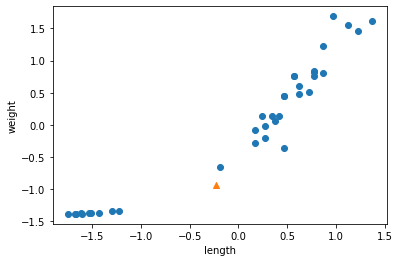

In [36]:
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0],new[1],marker="^")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

# 전처리 데이터에서 모델 훈련

In [37]:
test_scaled=(test_input-mean)/std

kn.fit(train_scaled,train_target)
kn.score(test_scaled,test_target)

1.0

In [38]:
print(kn.predict([new]))

[1.]


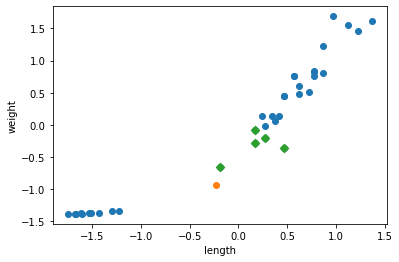

In [39]:
distances,indexs=kn.kneighbors([new])
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0],new[1])
plt.scatter(train_scaled[indexs,0],train_scaled[indexs,1],marker='D')
plt.xlabel("length")
plt.ylabel("weight")
plt.show()